In [15]:
import pandas as pd 
import numpy as np

import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV  
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [16]:
data = pd.read_csv("heart_disease.csv",encoding='utf-8')
# data.head()
#data processing get the format of all data
# data.info()

In [17]:
data.nunique()
#transform the yes = 1, no = 0, and male = 1, female = 0;
data = data[data.columns].replace({'Yes': 1, 'No': 0, 'Male':1,'Female':0})
#transform the special data to general
data = data[data.columns].replace({'No, borderline diabetes': 0, 'Yes (during pregnancy)': 1})
#transform column 'Diabetic' to int as it only contains 0 and 1
data['Diabetic'] = data['Diabetic'].astype(int)
# data.head()

In [18]:
#standardize features; z = (sample - mean)/ standard deviation
stand_col = ['BMI','PhysicalHealth','MentalHealth','SleepTime']
scaler = StandardScaler().fit(data[stand_col])
data[stand_col] = scaler.transform(data[stand_col])
# data.head()

In [19]:
# use one hot encoding scheme to deal with the rest categorical data.
enc = OneHotEncoder(handle_unknown = 'ignore')
unProcessColumns = ['AgeCategory', 'Race']
enc.fit(data[unProcessColumns])
processedData = enc.transform(data[unProcessColumns]).toarray()
# join processed data with the data set and drop off the unprocessed data;
data = pd.concat([data, pd.DataFrame(processedData)],axis = 1)
data = data.drop(columns = unProcessColumns,axis = 1)
# data.head()

In [20]:
# seperate features and lable
label = data['HeartDisease']
features = data.drop(columns=['HeartDisease'],axis=1)

In [21]:
#use cross validation to train the model
X_train,X_test,y_train,y_test = train_test_split(features,label,test_size = 0.16,random_state = 1)
X_train.shape, y_train.shape, X_test.shape, y_test.shape
    

((839, 32), (839,), (160, 32), (160,))

In [22]:
# def KNN_prediction():
#     listAcc = []
#     for n in range(1,15):
#         knn = KNeighborsClassifier(n_neighbors= n)
#         knn.fit(X_train,y_train)
#         knn_predict = knn.predict(X_test)
#         knn_accuracy = accuracy_score(y_test,knn_predict)
#         listAcc.append(metrics.accuracy_score(y_test,knn_predict))
#     #plot the accuracy and N
#     plt.figure(figsize=(10,6))
#     plt.plot(range(1,15),listAcc,color='blue', linestyle='dashed', 
#      marker='o',markerfacecolor='red', markersize=10)
#     plt.title("Accuracy VS K value")
#     plt.xlabel("K")
#     plt.ylabel("Accuracy")
#     print("Accuracy: {0}".format(knn_accuracy))
#     print("Maximum accuracy: ",max(listAcc),"at K =",listAcc.index(max(listAcc)))
    
# KNN_prediction()


confusion metrics: 
[[132   1]
 [ 24   3]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       133
           1       0.75      0.11      0.19        27

    accuracy                           0.84       160
   macro avg       0.80      0.55      0.55       160
weighted avg       0.83      0.84      0.79       160



/Users/lynnyang/opt/anaconda3/envs/DIA/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/lynnyang/opt/anaconda3/envs/DIA/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/lynnyang/opt/anaconda3/envs/DIA/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


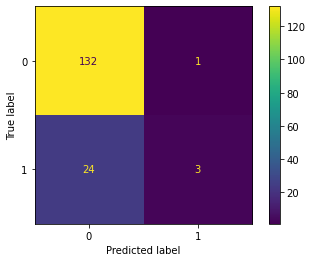

In [23]:
knn = KNeighborsClassifier(n_neighbors= 6)
knn.fit(X_train,y_train)
knn_predict = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test,knn_predict,labels=knn.classes_)

knn_accuracy = accuracy_score(y_test,knn_predict)
#AOC calculation
y_pred_proba_KNN = knn.predict_proba(X_test)[::,1]
fpr_KNN, tpr_KNN, _ = metrics.roc_curve(y_test, y_pred_proba_KNN)
auc_KNN = metrics.roc_auc_score(y_test, y_pred_proba_KNN)

print("confusion metrics: ")
print(knn_conf_matrix)
print(classification_report(y_test,knn_predict))
disp = ConfusionMatrixDisplay(confusion_matrix=knn_conf_matrix,display_labels=knn.classes_)
disp.plot()
plt.show()

/Users/lynnyang/opt/anaconda3/envs/DIA/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.7875
confusion metrics: 
[[124   9]
 [ 25   2]]


/Users/lynnyang/opt/anaconda3/envs/DIA/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/lynnyang/opt/anaconda3/envs/DIA/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


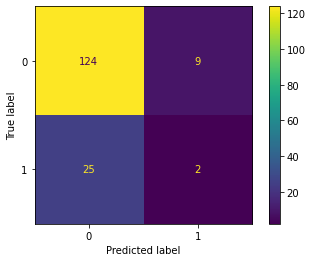

In [24]:
# support vector classifier

svc = SVC(kernel="sigmoid",C=0.1,gamma=1,probability=True)
svc.fit(X_train,y_train)
svc_predict = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predict)
svc_accuracy = accuracy_score(y_test, svc_predict)
print(svc_accuracy)
print("confusion metrics: ")
print(svc_conf_matrix)

y_pred_proba_SVC = svc.predict_proba(X_test)[::,1]
fpr_SVC, tpr_SVC, _ = metrics.roc_curve(y_test, y_pred_proba_SVC)
auc_SVC = metrics.roc_auc_score(y_test, y_pred_proba_SVC)

#     print(svc_conf_matrix)
#     print(classification_report(y_test,svc_predict))
disp = ConfusionMatrixDisplay(confusion_matrix=svc_conf_matrix,display_labels=svc.classes_)
disp.plot()
plt.show() 

In [25]:
grid = GridSearchCV(SVC(), param_grid={"C":[0.1, 1, 10,1000], \
                                       "kernel":["sigmoid"]}, refit = True, verbose = 3)  
grid.fit(X_train, y_train)  
print("The best parameters are %s with a score of %0.2f" %(grid.best_params_, grid.best_score_))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .............C=0.1, kernel=sigmoid;, score=0.845 total time=   0.0s
[CV 2/5] END .............C=0.1, kernel=sigmoid;, score=0.851 total time=   0.0s
[CV 3/5] END .............C=0.1, kernel=sigmoid;, score=0.857 total time=   0.0s
[CV 4/5] END .............C=0.1, kernel=sigmoid;, score=0.851 total time=   0.0s
[CV 5/5] END .............C=0.1, kernel=sigmoid;, score=0.856 total time=   0.0s
[CV 1/5] END ...............C=1, kernel=sigmoid;, score=0.804 total time=   0.0s
[CV 2/5] END ...............C=1, kernel=sigmoid;, score=0.827 total time=   0.0s
[CV 3/5] END ...............C=1, kernel=sigmoid;, score=0.833 total time=   0.0s
[CV 4/5] END ...............C=1, kernel=sigmoid;, score=0.798 total time=   0.0s
[CV 5/5] END ...............C=1, kernel=sigmoid;, score=0.826 total time=   0.0s
[CV 1/5] END ..............C=10, kernel=sigmoid;, score=0.738 total time=   0.0s
[CV 2/5] END ..............C=10, kernel=sigmoid;,

/Users/lynnyang/opt/anaconda3/envs/DIA/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/lynnyang/opt/anaconda3/envs/DIA/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/lynnyang/opt/anaconda3/envs/DIA/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/lynnyang/opt/anaconda3/envs/DIA/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with d

[CV 4/5] END ..............C=10, kernel=sigmoid;, score=0.708 total time=   0.0s
[CV 5/5] END ..............C=10, kernel=sigmoid;, score=0.749 total time=   0.0s
[CV 1/5] END ............C=1000, kernel=sigmoid;, score=0.792 total time=   0.0s
[CV 2/5] END ............C=1000, kernel=sigmoid;, score=0.786 total time=   0.0s
[CV 3/5] END ............C=1000, kernel=sigmoid;, score=0.780 total time=   0.0s
[CV 4/5] END ............C=1000, kernel=sigmoid;, score=0.714 total time=   0.0s
[CV 5/5] END ............C=1000, kernel=sigmoid;, score=0.731 total time=   0.0s
The best parameters are {'C': 0.1, 'kernel': 'sigmoid'} with a score of 0.85


/Users/lynnyang/opt/anaconda3/envs/DIA/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/lynnyang/opt/anaconda3/envs/DIA/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/lynnyang/opt/anaconda3/envs/DIA/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/lynnyang/opt/anaconda3/envs/DIA/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with d

[0.7875, 0.18181818181818182, 0.07407407407407407]
[0.84375, 0.75, 0.1111111111111111]


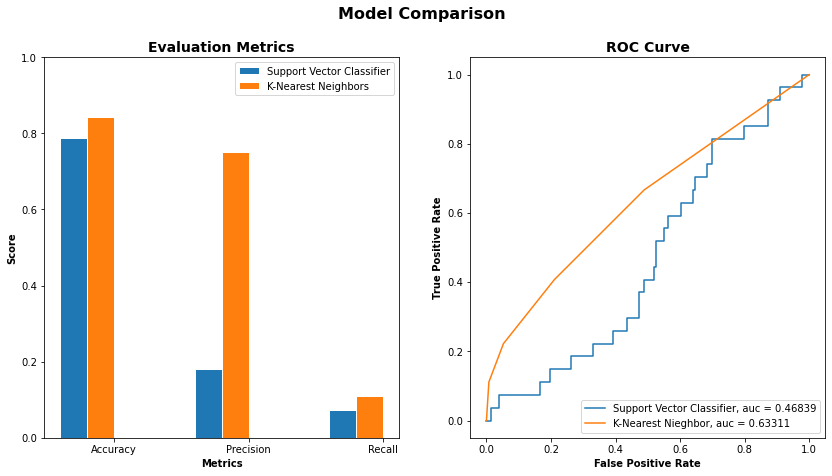

In [26]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')
barWidth = 0.2

svc_score = [metrics.accuracy_score(y_test,svc_predict),\
             metrics.precision_score(y_test,svc_predict),\
             metrics.recall_score(y_test,svc_predict)]
print(svc_score)
knn_score = [metrics.accuracy_score(y_test,knn_predict),\
             metrics.precision_score(y_test,knn_predict),\
             metrics.recall_score(y_test,knn_predict)]
print(knn_score)
# Set position of bar on X axis
r1 = np.arange(len(svc_score))
r2 = [x + barWidth for x in r1]

# Make the plot
ax1.bar(r1, svc_score, width=barWidth, edgecolor='white', label='Support Vector Classifier')
ax1.bar(r2, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(svc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(fpr_SVC, tpr_SVC, label='Support Vector Classifier, auc = {:0.5f}'.format(auc_SVC))
ax2.plot(fpr_KNN, tpr_KNN, label='K-Nearest Nieghbor, auc = {:0.5f}'.format(auc_KNN))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()